In [0]:
!pip install treeinterpreter

In [0]:
# connect to local working directory on Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
import sys
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as pl
from pylab import savefig

import seaborn as sns
sns.set()
plt.style.use("dark_background")

In [0]:
# Define main workspace directory path
MY_WORKSPACE_DIR = "/content/drive/My Drive/Colab Notebooks/CAiSE/RandomForest/"


## BPIC 2011

In [0]:
# get example of tran and test files used for classification
DATASET_NAME = "bpic2011"
CHUNK = 1
TRAIN = MY_WORKSPACE_DIR + "train_" + DATASET_NAME + "_p" + str(CHUNK) + ".csv"
TEST =  MY_WORKSPACE_DIR + "test_"  + DATASET_NAME + "_p" + str(CHUNK) + ".csv"

In [0]:
# load train and test sets

df_train = pd.read_csv(TRAIN).drop(["Unnamed: 0"], axis=1)
df_test = pd.read_csv(TEST).drop(["Unnamed: 0"], axis=1)

df_train.head(5)

,Diagnosis,Treatment code,Diagnosis code,case Specialism code,Diagnosis Treatment Combination ID,Age,Case ID,Activity,Producer code,Section,Specialism code,group,Number of executions,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed,case_length
0,maligniteit cervix,TC103,M13,SC61,DTC376907,33.0,0,AC419100,SRTH,Section 5,SC61,Radiotherapy,1.0,2005-01-03 09:00:00,0.0,1.0,0.0,9.0,5702400.0,0.0,1
1,maligniteit cervix,TC3201,DC822,SC7,DTC395310,52.0,2,AC411100,SIOG,Section 1,SC13,Internal Specialisms clinic,1.0,2005-01-03 09:00:00,0.0,1.0,0.0,9.0,69811200.0,0.0,1
2,maligniteit ovarium,TC9101,DC821,SC7,DTC262090,56.0,3,AC370000,CRLA,Section 4,SC86,General Lab Clinical Chemistry,1.0,2005-01-03 09:00:00,0.0,1.0,0.0,9.0,83635200.0,0.0,1
3,Gynaecologische tumoren,TC62,DC106,SC7,DTC153669,77.0,5,AC411100,SGAL,Section 2,SC7,Obstetrics & Gynaecology clinic,1.0,2005-01-06 09:00:00,0.0,1.0,3.0,9.0,97804800.0,0.0,1
4,maligniteit cervix,TC61,DC822,SC61,DTC158021,47.0,7,AC370401,CHE2,Section 4,SC86,General Lab Clinical Chemistry,1.0,2005-01-06 09:00:00,0.0,1.0,3.0,9.0,69465600.0,0.0,1


In [0]:
le = LabelEncoder()

FEATURES_TO_ENCODE = ["Diagnosis", "Treatment code", "Diagnosis code", "case Specialism code", "Diagnosis Treatment Combination ID", "Activity", "Producer code", "Section", "Specialism code", "group", "Complete Timestamp" ]

for feature in FEATURES_TO_ENCODE:
  df_train[ feature + "_Encoded" ] = le.fit_transform(df_train[ feature ])
  df_test[ feature + "_Encoded" ] = le.fit_transform(df_test[ feature ])


In [0]:
df_train = df_train.drop(FEATURES_TO_ENCODE, axis=1)
df_test = df_test.drop(FEATURES_TO_ENCODE, axis=1)

In [0]:
y_train = df_train[["remtime"]] 
X_train = df_train.drop(["remtime", "Case ID"], axis=1)

y_test = df_test[["remtime"]] 
X_test = df_test.drop(["remtime", "Case ID"], axis=1)

In [0]:

N_TREES = 100

clf = RandomForestRegressor(n_estimators=N_TREES, max_depth=100, random_state=0)
clf.fit(X_train, y_train) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
# Evaluate model
y_pred = clf.predict(X_test)

# Examine Different Metricss
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 24760432.401051067
Mean Squared Error: 1017236437066173.5


In [0]:
importance_vals = clf.feature_importances_
feature_labels = X_train.columns

for indx in range(0, len(feature_labels)):
  print(feature_labels[indx].replace("_Encoded", "") + "\t" + str( importance_vals[indx] ))

Age	0.14169352113181735
Number of executions	0.0
duration	0.0008804972696529558
month	0.017015732321002165
weekday	0.0167505805288908
hour	0.0
elapsed	0.018838409894651895
case_length	0.00081268431320222
Diagnosis	0.08695759813556597
Treatment code	0.1264799068375805
Diagnosis code	0.1399536557230291
case Specialism code	0.022370656213806118
Diagnosis Treatment Combination ID	0.16125756556204468
Activity	0.0011857081013410741
Producer code	0.003530864867460093
Section	0.0006191628209226529
Specialism code	0.0007579362423111028
group	0.0033498607465081193
Complete Timestamp	0.2575456592902132


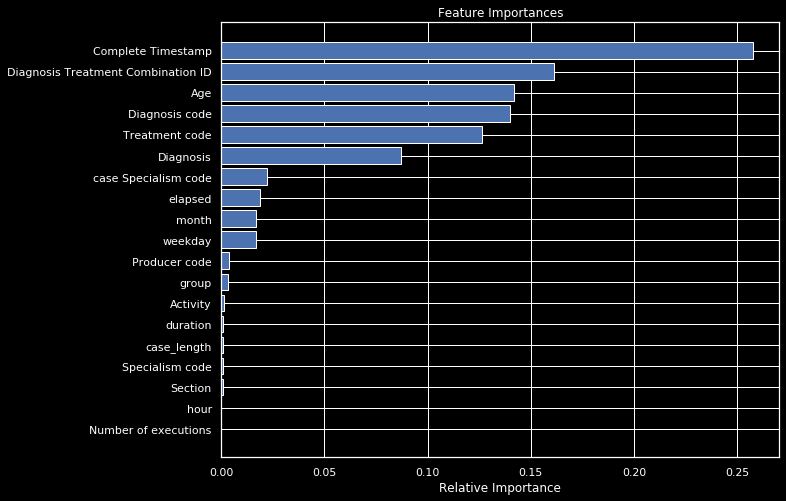

In [0]:
indices = np.argsort(importance_vals)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance_vals[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_labels[i].replace("_Encoded", "") for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
prediction, biases, contributions = ti.predict(clf, X_test)
for i in range(len(X_test)):
    print("Instance", i)
    print("Bias (trainset mean)", biases[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 feature_labels), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print ("-"*20 )

Output hidden; open in https://colab.research.google.com to view.

In [0]:
print (prediction)
print (biases + np.sum(contributions, axis=1))


In [0]:
# removing the timestamp from the equation
X_train = X_train.drop(["Complete Timestamp_Encoded"], axis=1)
X_test = X_test.drop(["Complete Timestamp_Encoded"], axis=1)


In [0]:
N_TREES = 100

clf = RandomForestRegressor(n_estimators=N_TREES, max_depth=100, random_state=0)
clf.fit(X_train, y_train) 

# Evaluate model
y_pred = clf.predict(X_test)

# Examine Different Metricss
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))

importance_vals = clf.feature_importances_
feature_labels = X_train.columns

for indx in range(0, len(feature_labels)):
  print(feature_labels[indx].replace("_Encoded", "") + "\t" + str( importance_vals[indx] ))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean Absolute Error: 24641195.169473324
Mean Squared Error: 994403162375246.5
Age	0.1375850604978128
Number of executions	0.0
duration	0.0034400855757980736
month	0.04231148790706498
weekday	0.0195389289426227
hour	0.0
elapsed	0.10824830319057989
case_length	0.0013616752484445244
Diagnosis	0.08995379428569367
Treatment code	0.1169949207495902
Diagnosis code	0.14803991327955887
case Specialism code	0.027016243476515447
Diagnosis Treatment Combination ID	0.2837146649910164
Activity	0.0021116839254483374
Producer code	0.009858477703303817
Section	0.003954659085311625
Specialism code	0.0014572307839374843
group	0.004412870357301253


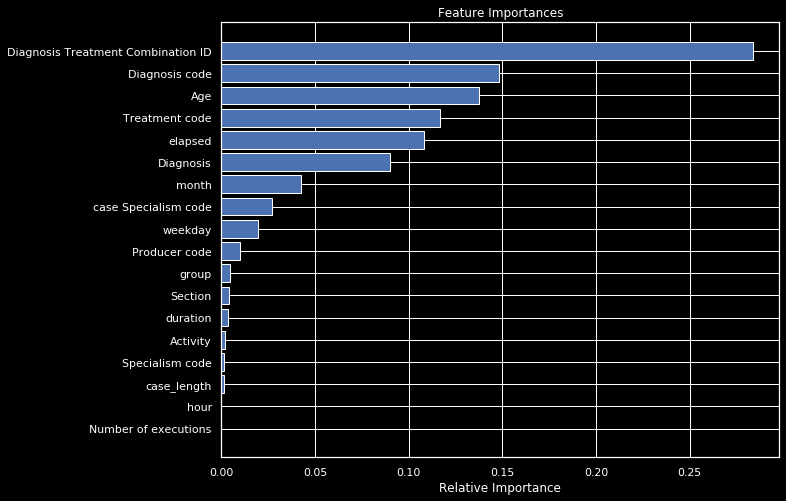

In [0]:
indices = np.argsort(importance_vals)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance_vals[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_labels[i].replace("_Encoded", "") for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
X_train["Remaining_Time"] = y_train

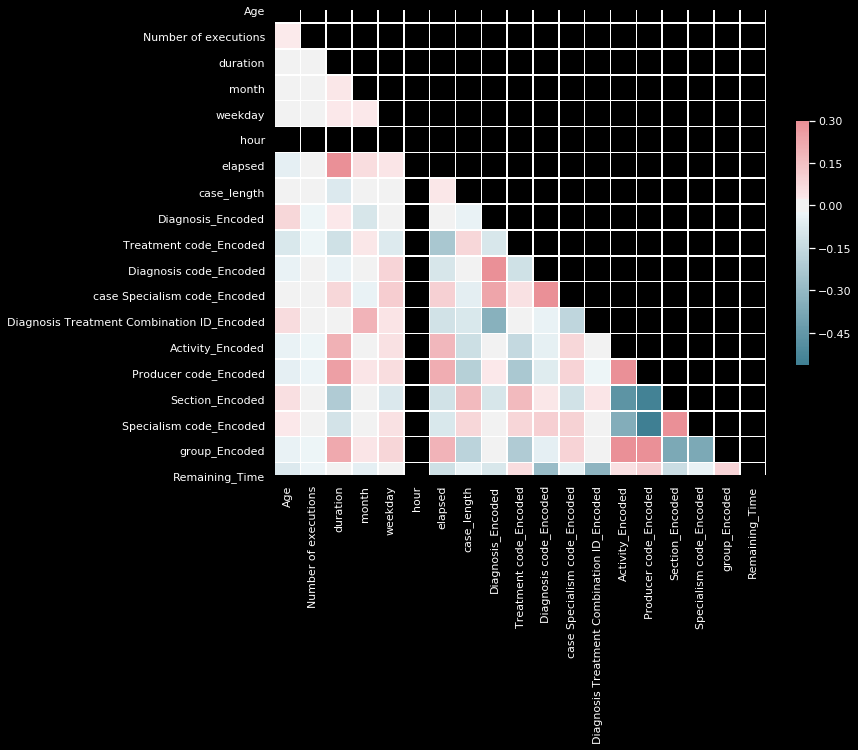

In [0]:
# Checking correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
# check the distribution of patients per Diagnosis Code (our class variable)

patients_diagnosis = df_train[["Case ID", "Diagnosis Treatment Combination ID"]]
patients_diagnosis = patients_diagnosis.groupby("Diagnosis Treatment Combination ID").count().rename(columns={"Case ID":"Num_Cases_per_Treatment"})
patients_diagnosis = patients_diagnosis.sort_values(["Num_Cases_per_Treatment"],ascending=False)

# separate variables for plotting
codes = patients_diagnosis.index.tolist()
num_patients_per_diag = patients_diagnosis["Num_Cases_per_Treatment"].values.tolist() 

#print("DISPLAY VALUES:")
#for indx in range(0, len(codes)):
  #print(codes[indx] + "\t" + str(num_patients_per_diag[indx]))
#print("\n")


KeyError: ignored

In [0]:
df = pd.DataFrame( columns = ["Treatment Code", "Num Cases"] )
df["Treatment Code"] = codes
df["Num Cases"] = num_patients_per_diag

df = df.groupby("Num Cases").count()
df



,Treatment Code
Num Cases,
55,8
66,10
78,5
91,6
105,6
120,5
136,1
153,3
171,2


<BarContainer object of 12 artists>

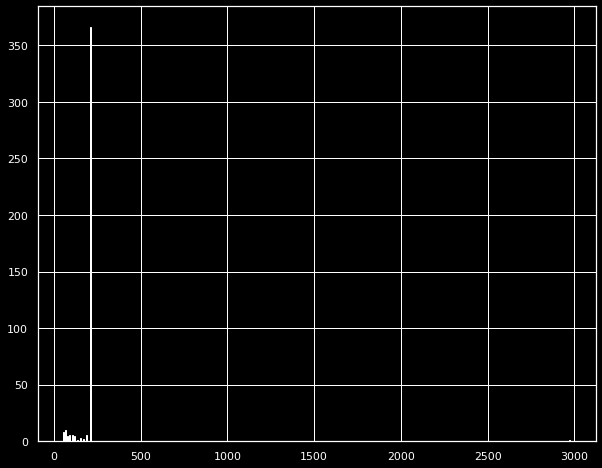

In [0]:
plt.figure(figsize=(10,8))
plt.bar(df.index.to_list(),df["Treatment Code"], color='b', width=5, align='center')
